In [1]:
import snap
import random
import os

# Load SNAP graph
print("Loading graph...")
G = snap.LoadEdgeList(snap.PNGraph, "Networks/Synthetic_Data.txt", 1, 0)
print(f"Graph loaded with {G.GetNodes()} nodes and {G.GetEdges()} edges.")

Loading graph...
Graph loaded with 12226049 nodes and 16071984 edges.


In [2]:
# Parameters
fixed_probability = 0.005
max_days = 14
iterations = 1000
seed_nodes = [0]

#Precompute node probabilities once
node_probabilities = {}
for NI in G.Nodes():
    node_probabilities[NI.GetId()] = fixed_probability

def ICM(G, seed_nodes, node_probabilities, max_days=14):
    activated_nodes = set(seed_nodes)
    new_active = set(seed_nodes)
    daily_retweeters = [len(new_active)]

    for _ in range(1, max_days):
        next_active = set()
        for node in new_active:
            if not G.IsNode(node): continue
            NI = G.GetNI(node)
            for neighbor in NI.GetOutEdges():
                if neighbor not in activated_nodes and random.random() < node_probabilities[neighbor]:
                    next_active.add(neighbor)

        if not next_active:
            # Fill remaining days with zeros to keep consistent output length
            remaining_days = max_days - len(daily_retweeters)
            daily_retweeters.extend([0] * remaining_days)
            break

        activated_nodes.update(next_active)
        new_active = next_active
        daily_retweeters.append(len(next_active))

    return daily_retweeters

In [4]:
def getDailyRetweets(G, seed_nodes, fixed_probability = 0.005, max_days=14, iterations=1000):

    node_probabilities = {NI.GetId(): fixed_probability for NI in G.Nodes()}
    daily_sums = [0] * max_days

    for _ in range(iterations):
        daily_retweeters = ICM(G, seed_nodes, node_probabilities, max_days)
        for day in range(max_days):
            daily_sums[day] += daily_retweeters[day]

    average_retweets = [round(total / iterations, 2) for total in daily_sums]
    print("===============================================================")
    print("On Probability:", fixed_probability)
    print(f"Average Retweets: {average_retweets}")
    print("===============================================================")
    return average_retweets

# Run it
# getDailyRetweets(G, seed_nodes, fixed_probability, max_days, iterations)

In [7]:
# Create directory for results if it doesn't exist
os.makedirs("Results", exist_ok=True)
first_run = False
output_file = "Results/summary.txt"

# Example: Multiple probabilities
for i, prob in enumerate([0.0001, 0.001, 0.01, 0.1]):
    seed_nodes = [0]
    avg_retweets = getDailyRetweets(G, seed_nodes, fixed_probability=prob, max_days=14, iterations=1000)

    # Determine file mode
    mode = "w" if first_run else "a"
    with open(output_file, mode) as f:
        if first_run:
            f.write("Run_ID\tProbability\tSeeds\tAverageRetweets\n")
            first_run = False
        f.write(f"{i+1}\t{prob}\t{seed_nodes}\t{avg_retweets}\n")

On Probability: 0.0001
Average Retweets: [1.0, 4.99, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
On Probability: 0.001
Average Retweets: [1.0, 49.86, 1.88, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
On Probability: 0.01
Average Retweets: [1.0, 499.03, 195.94, 17.95, 0.66, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
On Probability: 0.1
Average Retweets: [1.0, 4999.32, 19628.56, 17508.0, 5880.7, 1591.9, 390.49, 90.85, 20.47, 4.54, 1.02, 0.2, 0.05, 0.01]


In [19]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import pandas as pd
import numpy as np

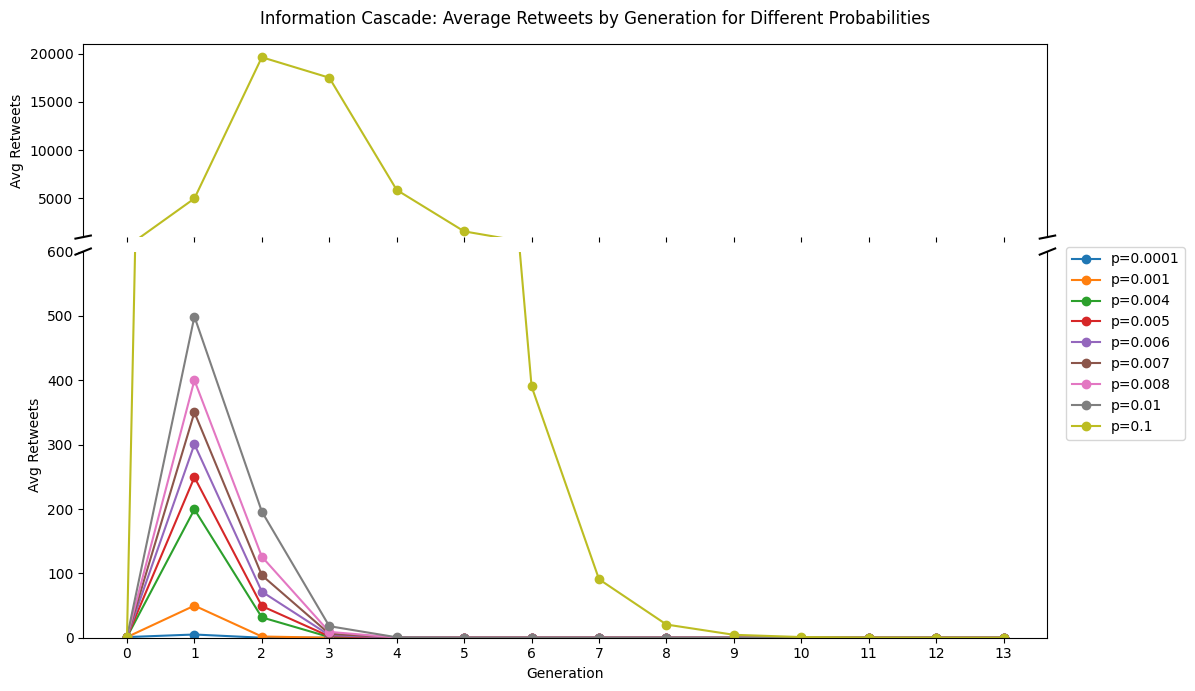

In [25]:
# Your data from summary.txt
labels = [
    "p=0.0001", "p=0.001", "p=0.004", "p=0.005", "p=0.006",
    "p=0.007", "p=0.008", "p=0.01", "p=0.1"
]

curves = [
    [1.0, 4.99, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 49.86, 1.88, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 199.45, 31.62, 1.13, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 249.42, 49.12, 2.2, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 300.65, 71.54, 3.94, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 350.13, 96.99, 6.18, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 400.15, 125.88, 9.08, 0.27, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 499.03, 195.94, 17.95, 0.66, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 4999.32, 19628.56, 17508.0, 5880.7, 1591.9, 390.49, 90.85, 20.47, 4.54, 1.02, 0.2, 0.05, 0.01]
]

generations = list(range(14))

# Create broken-axis plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 7), gridspec_kw={'height_ratios': [1, 2]})

# Y-axis ranges: top and bottom
ax1.set_ylim(1000, 21000)  # Top: large spikes
ax2.set_ylim(0, 600)       # Bottom: subtle differences

# Plot each line on both axes
for label, y in zip(labels, curves):
    ax1.plot(generations, y, marker='o', label=label)
    ax2.plot(generations, y, marker='o', label=label)

# Hide spines and add diagonal break marks
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)

d = .008
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # top-left
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right

# Labels and layout
fig.suptitle("Information Cascade: Average Retweets by Generation for Different Probabilities")
ax2.set_xlabel("Generation")
ax1.set_ylabel("Avg Retweets")
ax2.set_ylabel("Avg Retweets")
ax2.legend(loc="upper right", bbox_to_anchor=(1.15, 1.03))

ax2.set_xticks(generations)  # ensure all generations show on x-axis

plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
plt.show()

In [29]:
data = []
with open('Results/summary.txt', 'r') as f:
    # Skip header
    next(f)
    for line in f:
        parts = line.strip().split('\t')
        run_id = int(parts[0])
        probability = float(parts[1])
        # We'll ignore seeds for this visualization
        avg_retweets = eval(parts[3])  # Convert string representation of list to actual list
        data.append({
            'Run_ID': run_id,
            'Probability': probability,
            'AverageRetweets': avg_retweets
        })

# Create a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Sort by probability for better visualization
df = df.sort_values('Probability')

c:\Users\Brian G\source\repos\MM\MathMod\venv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  import sys


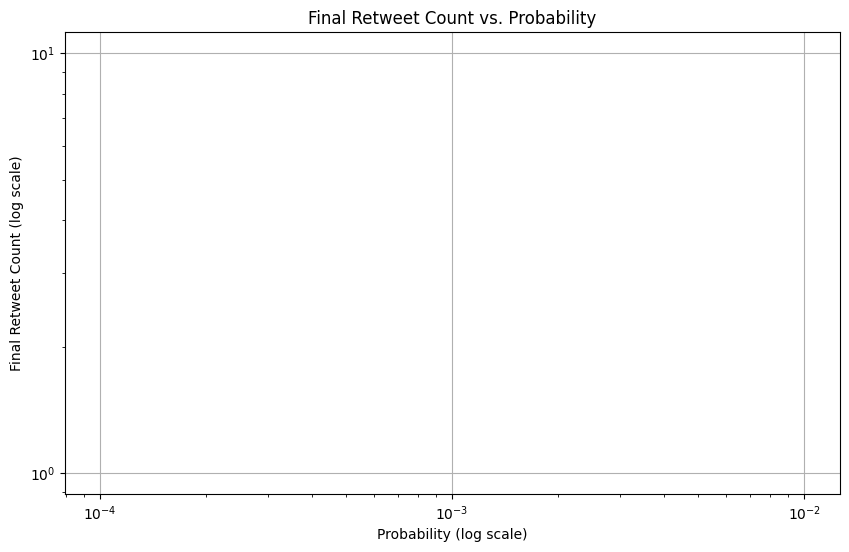

In [30]:
# Get the final retweet counts (last element in each AverageRetweets list)
df['FinalRetweets'] = df['AverageRetweets'].apply(lambda x: x[-1])

plt.figure(figsize=(10, 6))
plt.scatter(df['Probability'], df['FinalRetweets'], s=100)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Probability (log scale)')
plt.ylabel('Final Retweet Count (log scale)')
plt.title('Final Retweet Count vs. Probability')
plt.grid(True)
plt.show()

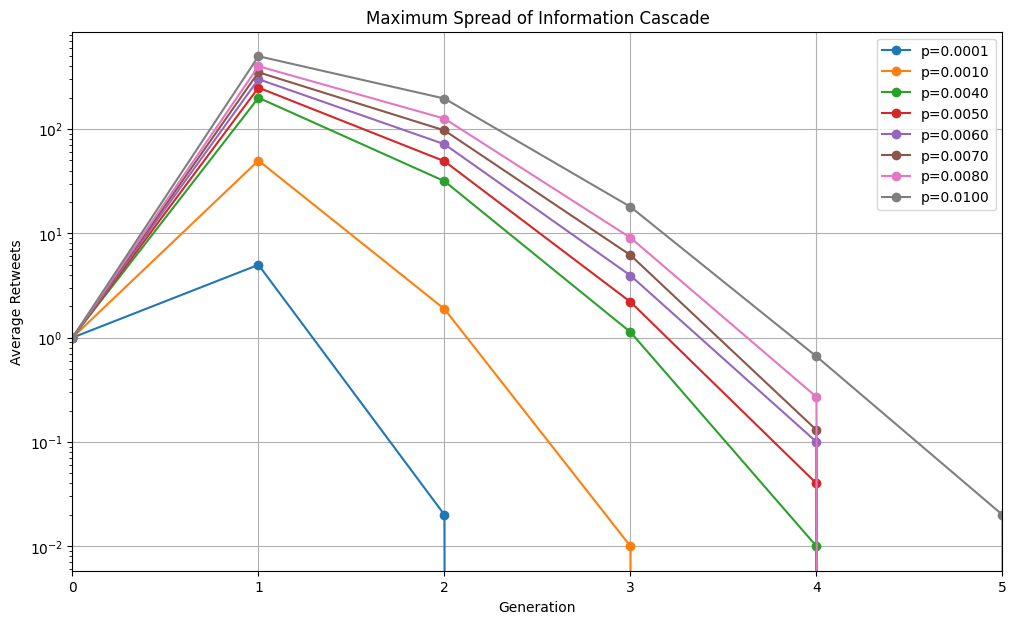

In [ ]:
plt.figure(figsize=(12, 7))

for i, row in df.iterrows():
    generations = range(len(row['AverageRetweets']))
    plt.plot(generations, row['AverageRetweets'], 
             label=f'p={row["Probability"]:.4f}',
             marker='o')

plt.xlabel('Days')
plt.ylabel('Average Retweets')
plt.title('Maximum Spread of Information Cascade')
plt.yscale('log')
plt.xlim(0, 5)  # Focus on first few generations where most action happens
plt.grid(True)
plt.legend()
plt.show()

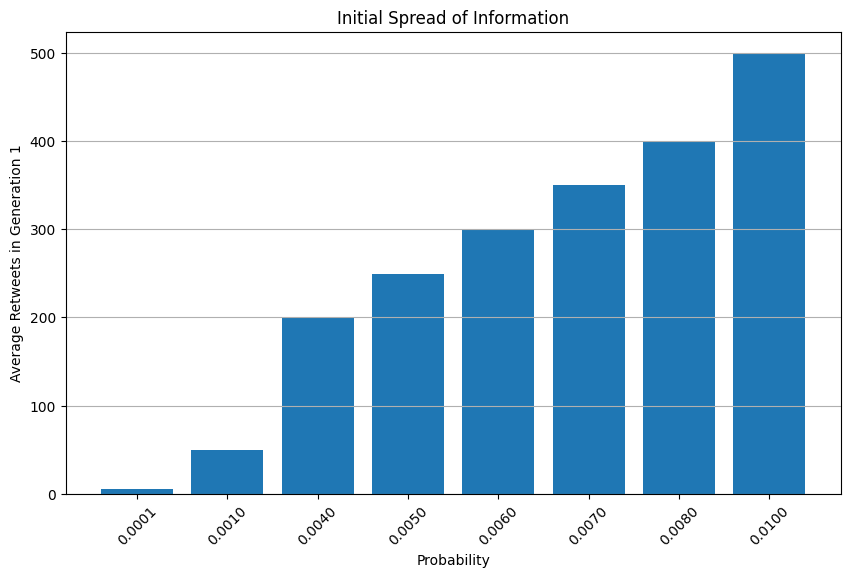

In [32]:
# Get generation 1 retweets
df['Gen1Retweets'] = df['AverageRetweets'].apply(lambda x: x[1])

plt.figure(figsize=(10, 6))
plt.bar(range(len(df)), df['Gen1Retweets'], 
        tick_label=[f'{p:.4f}' for p in df['Probability']])
plt.xlabel('Probability')
plt.ylabel('Average Retweets in Generation 1')
plt.title('Initial Spread of Information')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()